<a href="https://colab.research.google.com/github/ArthAgrawal/Brain-Tumor-Detection/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import zipfile
import os

# Path to the dataset zip file in your Google Drive
dataset_zip_path = '/content/drive/MyDrive/Brain_Tumor/Brain_Tumor.zip'

# Path to extract the dataset
extract_path = '/content/dataset/'

# Extract the dataset
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check the extracted files
print(os.listdir(extract_path))


['brain_tumor_dataset', 'yes', 'no']


In [4]:
# Import Tensorflow 2.0
import tensorflow as tf

# other packages
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [6]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split


# Path to the extracted dataset folder
dataset_path = '/content/dataset/brain_tumor_dataset/'

# List to store images and labels
images = []
labels = []

# Iterate through 'yes' and 'no' subfolders
for foldername in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, foldername)
    if os.path.isdir(folder_path):
        label = 1 if foldername == 'yes' else 0  # 1 for tumor, 0 for no tumor
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image as grayscale
            img = cv2.resize(img, (128, 128))  # Resize image to 128x128 (or any desired size)
            images.append(img)
            labels.append(label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize pixel values to [0, 1]
images = images.astype(np.float32) / 255.0

# Add channel dimension to images
images = np.expand_dims(images, axis=-1)

# Shuffle the data
indices = np.arange(images.shape[0])
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Print the shape of the datasets
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (202, 128, 128, 1)
Train labels shape: (202,)
Test images shape: (51, 128, 128, 1)
Test labels shape: (51,)


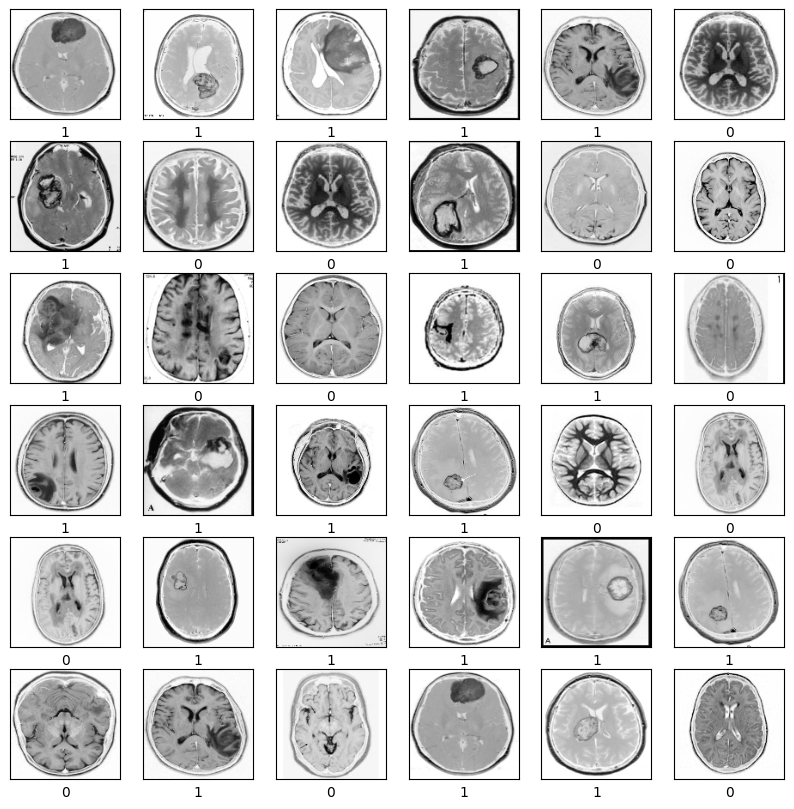

In [7]:
import matplotlib.pyplot as plt

# Visualize random images from the training set
plt.figure(figsize=(10, 10))
random_inds = np.random.choice(202, 36)  # Choose 36 random indices from the 202 training samples
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

plt.show()


In [18]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return cnn_model


In [19]:
# Compile the model
cnn_model = build_cnn_model()
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

Epoch 1/11
7/7 [==============================] - 8s 1s/step - loss: 0.0316 - accuracy: 1.0000 - val_loss: 0.6122 - val_accuracy: 0.8235
Epoch 2/11
7/7 [==============================] - 4s 640ms/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.8373 - val_accuracy: 0.8039
Epoch 3/11
7/7 [==============================] - 6s 749ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.6894 - val_accuracy: 0.7843
Epoch 4/11
7/7 [==============================] - 7s 908ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 1.1510 - val_accuracy: 0.7843
Epoch 5/11
7/7 [==============================] - 4s 638ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.8336 - val_accuracy: 0.7843
Epoch 6/11
7/7 [==============================] - 5s 709ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.9251 - val_accuracy: 0.7843
Epoch 7/11
7/7 [==============================] - 7s 915ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.0434 - val_accuracy: 0.7647
Epoch 8/11
7/7 [=======

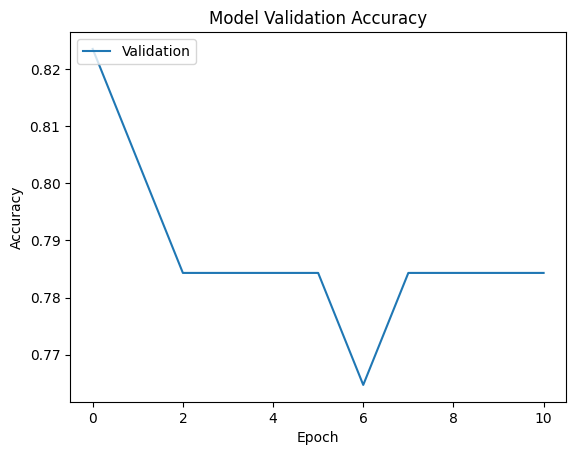

In [23]:
import matplotlib.pyplot as plt

history = cnn_model.fit(train_images, train_labels, epochs=11, validation_data=(test_images, test_labels))

# Plot validation accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Model Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Validation'], loc='upper left')
plt.show()


In [24]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

2/2 [==============================] - 0s 121ms/step - loss: 1.0100 - accuracy: 0.7843
Test accuracy: 0.7843137383460999


In [25]:
predictions = cnn_model.predict(test_images)

2/2 [==============================] - 0s 113ms/step


1/1 [==============================] - 0s 48ms/step
Predicted Class: Tumor | Actual Label: No Tumor


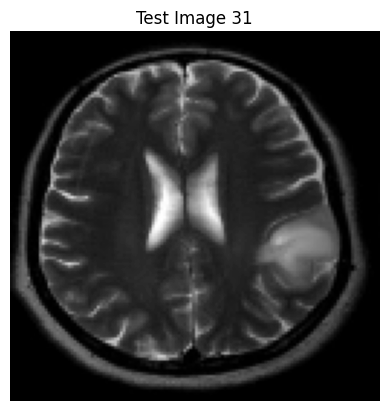

1/1 [==============================] - 0s 62ms/step
Predicted Class: No Tumor | Actual Label: No Tumor


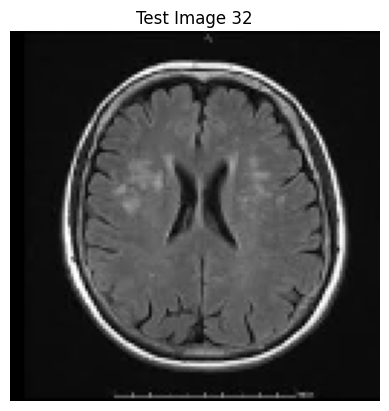

1/1 [==============================] - 0s 38ms/step
Predicted Class: No Tumor | Actual Label: No Tumor


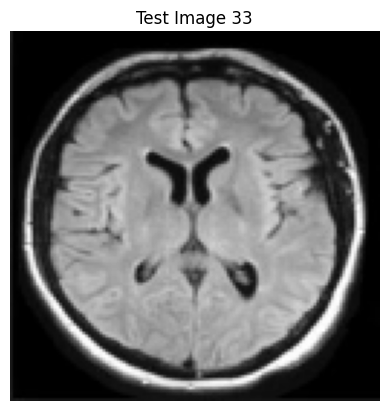

1/1 [==============================] - 0s 39ms/step
Predicted Class: No Tumor | Actual Label: Tumor


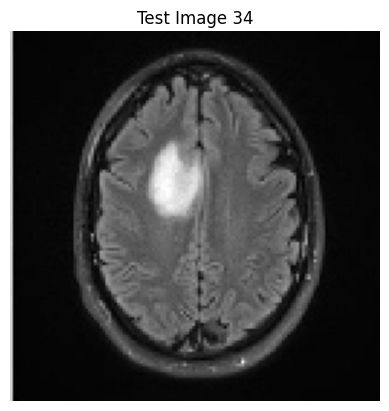

1/1 [==============================] - 0s 41ms/step
Predicted Class: Tumor | Actual Label: Tumor


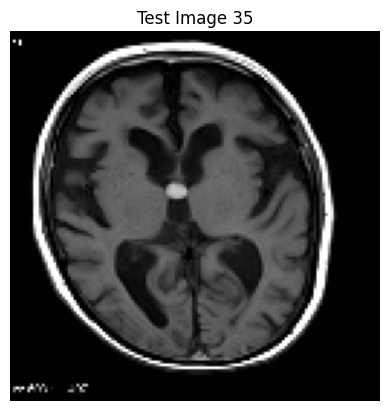

1/1 [==============================] - 0s 43ms/step
Predicted Class: No Tumor | Actual Label: No Tumor


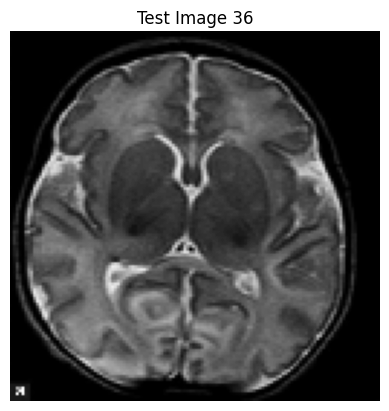

1/1 [==============================] - 0s 45ms/step
Predicted Class: No Tumor | Actual Label: No Tumor


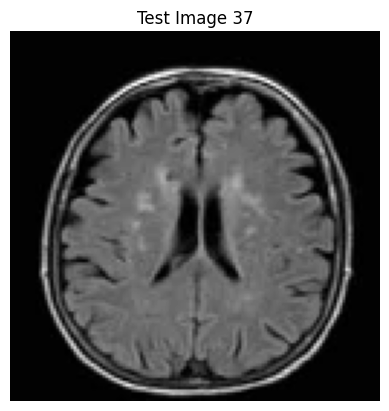

1/1 [==============================] - 0s 50ms/step
Predicted Class: Tumor | Actual Label: Tumor


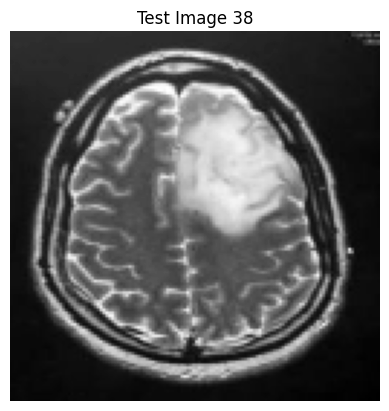

1/1 [==============================] - 0s 47ms/step
Predicted Class: Tumor | Actual Label: No Tumor


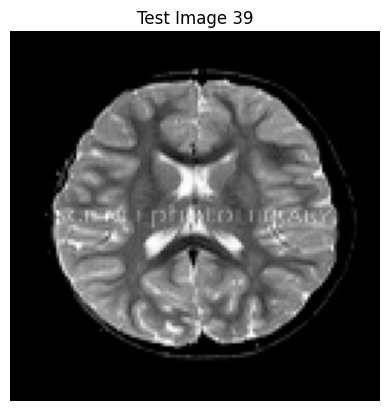

1/1 [==============================] - 0s 43ms/step
Predicted Class: Tumor | Actual Label: Tumor


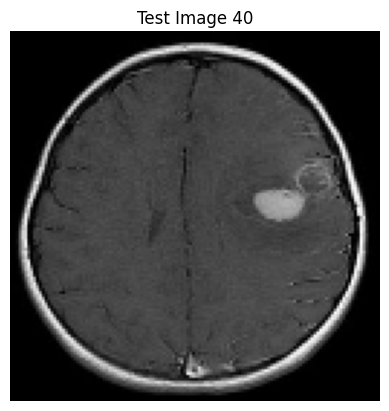

In [42]:
import matplotlib.pyplot as plt

def plot_and_predict(image_index, test_images, test_labels, model):
    """
    Plots a test image, predicts its class, and displays the prediction along with the actual label.

    Args:
        image_index: Index of the image to be loaded from the test set.
        test_images: NumPy array containing the test images.
        test_labels: NumPy array containing the test labels (0 or 1).
        model: Trained model to use for prediction.
    """
    # Load the image
    image = test_images[image_index]

    # Plot the image
    plt.imshow(image, cmap="gray")
    plt.title(f"Test Image {image_index+1}")
    plt.axis("off")

    # Make prediction
    img_array = np.expand_dims(image, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    predicted_class = int(prediction[0][0] > 0.5)

    # Get class names (assuming 0 - No Tumor, 1 - Tumor)
    class_names = ["No Tumor", "Tumor"]

    # Display prediction and actual label
    actual_class = test_labels[image_index]
    print(f"Predicted Class: {class_names[predicted_class]} | Actual Label: {class_names[actual_class]}")
    plt.show()

def plot_batch_predictions(start_index, test_images, test_labels, model):
    """
    Plots and predicts the classes of 10 test images starting from start_index.

    Args:
        start_index: Starting index of the batch of images to plot and predict.
        test_images: NumPy array containing the test images.
        test_labels: NumPy array containing the test labels (0 or 1).
        model: Trained model to use for prediction.
    """
    for i in range(start_index, start_index + 10):
        plot_and_predict(i, test_images, test_labels, model)

# Example usage (assuming test_images, test_labels, and model are available)
batch_start_index = 30  # Select a starting index from your test set (0-based indexing)
plot_batch_predictions(batch_start_index, test_images, test_labels, cnn_model)
